In [1]:
import pandas
import glob
import matplotlib.pyplot as plt

In [2]:
def load_meta_dataframe(log_data):
    files = glob.glob(log_data)
    df = pandas.DataFrame()
    for file in files:
        df_tmp = pandas.read_csv(file, delimiter=';', header=None, converters={0:str.strip, 1:str.strip}).transpose()
        df_tmp.rename(columns=df_tmp.iloc[0], inplace=True)
        df_tmp.drop([0], inplace=True)
        df_tmp['logfile'] = file.split('.')[0]
        df = df.append(df_tmp, ignore_index=True)
    return df

In [3]:
df_meta = load_meta_dataframe('nesh_logs/*.meta')

In [4]:
df_meta

,timestamp,osu_exe,ntasks,nodes,tasks-per-node,constraint,nodelist,slurm_log,runtime,mpi_api,logfile
0,2021-06-21T19:11:53+02:00,mpi/startup/osu_init,8,8,1(x8),"cascade,mem192","neshcl[142-143,268-273]",slurm-1333633.out,native_openmpi-3.1.6,pmi2,nesh_logs/2021-06-21T19:11:53+02:00_a4b780e4-8...
1,2021-06-21T19:14:01+02:00,mpi/startup/osu_init,8,8,1(x8),"cascade,mem192","neshcl[142-143,268-273]",slurm-1333633.out,native_intelmpi-20.0.4,pmi2,nesh_logs/2021-06-21T19:14:01+02:00_c57ff681-d...
2,2021-06-21T19:13:34+02:00,mpi/collective/osu_allgather,8,2,4(x2),"cascade,mem192",neshcl[173-174],slurm-1333635.out,native_intelmpi-20.0.4,pmi2,nesh_logs/2021-06-21T19:13:34+02:00_deb80a52-4...
3,2021-06-21T19:12:03+02:00,mpi/collective/osu_allgather,8,2,4(x2),"cascade,mem192",neshcl[173-174],slurm-1333635.out,native_openmpi-3.1.6,pmi2,nesh_logs/2021-06-21T19:12:03+02:00_b0e94454-6...
4,2021-06-21T19:12:18+02:00,mpi/collective/osu_allgather,8,8,1(x8),"cascade,mem192","neshcl[142-143,268-273]",slurm-1333633.out,native_openmpi-3.1.6,pmi2,nesh_logs/2021-06-21T19:12:18+02:00_d48f4352-3...
...,...,...,...,...,...,...,...,...,...,...,...
235,2021-06-21T19:11:47+02:00,mpi/startup/osu_init,8,8,1(x8),"cascade,mem192","neshcl[142-143,268-273]",slurm-1333633.out,native_openmpi-3.1.6,pmi2,nesh_logs/2021-06-21T19:11:47+02:00_7281264c-0...
236,2021-06-21T19:14:34+02:00,mpi/startup/osu_init,8,8,1(x8),"cascade,mem192","neshcl[142-143,268-273]",slurm-1333633.out,singularity_mpich-3.4.1,pmi2,nesh_logs/2021-06-21T19:14:34+02:00_0791fd01-5...
237,2021-06-21T19:15:22+02:00,mpi/collective/osu_allgather,8,8,1(x8),"cascade,mem192","neshcl[142-143,268-273]",slurm-1333633.out,singularity_mpich-3.4.1,pmi2,nesh_logs/2021-06-21T19:15:22+02:00_5ae3e82d-b...
238,2021-06-21T19:14:03+02:00,mpi/startup/osu_init,8,4,2(x4),"cascade,mem192",neshcl[268-271],slurm-1333634.out,singularity_mpich-3.4.1,pmi2,nesh_logs/2021-06-21T19:14:03+02:00_e26bf8c0-9...


In [5]:
def read_osu_mpi_init(files):
    converters = {
        0: lambda x: int(x.split(':')[-1]),
        1: lambda x: float(x.split(':')[-1].split('ms')[0]),
        2: lambda x: float(x.split(':')[-1].split('ms')[0]),
        3: lambda x: float(x.split(':')[-1].split('ms')[0]),
    }
    df = pandas.DataFrame()
    for file in files:
        df_tmp = pandas.read_csv(file+'.log', comment='#', header=None, converters=converters, names=['nprocs', 'min', 'max', 'avg'])
        df_tmp['logfile'] = file
        df = df.append(df_tmp, ignore_index=True)
    return df

In [6]:
mask = df_meta['osu_exe'].str.contains('mpi/startup/osu_init')
files = df_meta[mask]['logfile'].to_list()
df_init = read_osu_mpi_init(files) # 120 experiments! 3-runtimes * 4-node-configs * 10-experiments
df_init = pandas.merge(df_meta, df_init, on='logfile', how='inner')

In [7]:
df_init

,timestamp,osu_exe,ntasks,nodes,tasks-per-node,constraint,nodelist,slurm_log,runtime,mpi_api,logfile,nprocs,min,max,avg
0,2021-06-21T19:11:53+02:00,mpi/startup/osu_init,8,8,1(x8),"cascade,mem192","neshcl[142-143,268-273]",slurm-1333633.out,native_openmpi-3.1.6,pmi2,nesh_logs/2021-06-21T19:11:53+02:00_a4b780e4-8...,8,109.0,121.0,116.0
1,2021-06-21T19:14:01+02:00,mpi/startup/osu_init,8,8,1(x8),"cascade,mem192","neshcl[142-143,268-273]",slurm-1333633.out,native_intelmpi-20.0.4,pmi2,nesh_logs/2021-06-21T19:14:01+02:00_c57ff681-d...,8,876.0,895.0,888.0
2,2021-06-21T19:13:37+02:00,mpi/startup/osu_init,8,4,2(x4),"cascade,mem192",neshcl[268-271],slurm-1333634.out,native_intelmpi-20.0.4,pmi2,nesh_logs/2021-06-21T19:13:37+02:00_eb9b4751-4...,8,354.0,357.0,356.0
3,2021-06-21T19:12:55+02:00,mpi/startup/osu_init,8,1,8,"cascade,mem192",neshcl126,slurm-1333636.out,singularity_mpich-3.4.1,pmi2,nesh_logs/2021-06-21T19:12:55+02:00_be78d802-8...,8,33.0,110.0,67.0
4,2021-06-21T19:13:55+02:00,mpi/startup/osu_init,8,2,4(x2),"cascade,mem192",neshcl[173-174],slurm-1333635.out,singularity_mpich-3.4.1,pmi2,nesh_logs/2021-06-21T19:13:55+02:00_a2c9ed3d-4...,8,37.0,73.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2021-06-21T19:11:54+02:00,mpi/startup/osu_init,8,8,1(x8),"cascade,mem192","neshcl[142-143,268-273]",slurm-1333633.out,native_openmpi-3.1.6,pmi2,nesh_logs/2021-06-21T19:11:54+02:00_5c2eda68-3...,8,74.0,87.0,78.0
116,2021-06-21T19:11:51+02:00,mpi/startup/osu_init,8,8,1(x8),"cascade,mem192","neshcl[142-143,268-273]",slurm-1333633.out,native_openmpi-3.1.6,pmi2,nesh_logs/2021-06-21T19:11:51+02:00_c6fa3090-1...,8,68.0,81.0,73.0
117,2021-06-21T19:11:47+02:00,mpi/startup/osu_init,8,8,1(x8),"cascade,mem192","neshcl[142-143,268-273]",slurm-1333633.out,native_openmpi-3.1.6,pmi2,nesh_logs/2021-06-21T19:11:47+02:00_7281264c-0...,8,124.0,330.0,174.0
118,2021-06-21T19:14:34+02:00,mpi/startup/osu_init,8,8,1(x8),"cascade,mem192","neshcl[142-143,268-273]",slurm-1333633.out,singularity_mpich-3.4.1,pmi2,nesh_logs/2021-06-21T19:14:34+02:00_0791fd01-5...,8,25.0,55.0,41.0


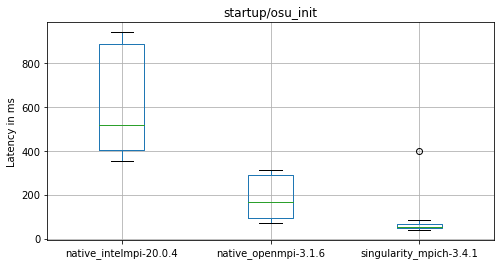

In [8]:
plt.figure(figsize=(8, 4))
df_init[['runtime', 'avg']].pivot(columns='runtime', values='avg').boxplot();
plt.ylabel('Latency in ms'); plt.title('startup/osu_init');

In [9]:
def read_osu_collective_allgather(files):
    df = pandas.DataFrame()
    for file in files:
        df_tmp = pandas.read_csv(file+'.log', comment='#', header=None, delim_whitespace=True, names=['message_size', 'latency_avg'])
        df_tmp['logfile'] = file
        df = df.append(df_tmp, ignore_index=True)
    return df

In [10]:
mask = df_meta['osu_exe'].str.contains('mpi/collective/osu_allgather')
files = df_meta[mask]['logfile'].to_list()
df_allgather = read_osu_collective_allgather(files)
df_allgather = pandas.merge(df_meta, df_allgather, on='logfile', how='inner')

In [11]:
df_allgather

,timestamp,osu_exe,ntasks,nodes,tasks-per-node,constraint,nodelist,slurm_log,runtime,mpi_api,logfile,message_size,latency_avg
0,2021-06-21T19:13:34+02:00,mpi/collective/osu_allgather,8,2,4(x2),"cascade,mem192",neshcl[173-174],slurm-1333635.out,native_intelmpi-20.0.4,pmi2,nesh_logs/2021-06-21T19:13:34+02:00_deb80a52-4...,1,3.52
1,2021-06-21T19:13:34+02:00,mpi/collective/osu_allgather,8,2,4(x2),"cascade,mem192",neshcl[173-174],slurm-1333635.out,native_intelmpi-20.0.4,pmi2,nesh_logs/2021-06-21T19:13:34+02:00_deb80a52-4...,2,2.67
2,2021-06-21T19:13:34+02:00,mpi/collective/osu_allgather,8,2,4(x2),"cascade,mem192",neshcl[173-174],slurm-1333635.out,native_intelmpi-20.0.4,pmi2,nesh_logs/2021-06-21T19:13:34+02:00_deb80a52-4...,4,2.64
3,2021-06-21T19:13:34+02:00,mpi/collective/osu_allgather,8,2,4(x2),"cascade,mem192",neshcl[173-174],slurm-1333635.out,native_intelmpi-20.0.4,pmi2,nesh_logs/2021-06-21T19:13:34+02:00_deb80a52-4...,8,3.33
4,2021-06-21T19:13:34+02:00,mpi/collective/osu_allgather,8,2,4(x2),"cascade,mem192",neshcl[173-174],slurm-1333635.out,native_intelmpi-20.0.4,pmi2,nesh_logs/2021-06-21T19:13:34+02:00_deb80a52-4...,16,2.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2515,2021-06-21T19:14:08+02:00,mpi/collective/osu_allgather,8,8,1(x8),"cascade,mem192","neshcl[142-143,268-273]",slurm-1333633.out,native_intelmpi-20.0.4,pmi2,nesh_logs/2021-06-21T19:14:08+02:00_7e4f1da4-c...,65536,134.53
2516,2021-06-21T19:14:08+02:00,mpi/collective/osu_allgather,8,8,1(x8),"cascade,mem192","neshcl[142-143,268-273]",slurm-1333633.out,native_intelmpi-20.0.4,pmi2,nesh_logs/2021-06-21T19:14:08+02:00_7e4f1da4-c...,131072,259.65
2517,2021-06-21T19:14:08+02:00,mpi/collective/osu_allgather,8,8,1(x8),"cascade,mem192","neshcl[142-143,268-273]",slurm-1333633.out,native_intelmpi-20.0.4,pmi2,nesh_logs/2021-06-21T19:14:08+02:00_7e4f1da4-c...,262144,415.27
2518,2021-06-21T19:14:08+02:00,mpi/collective/osu_allgather,8,8,1(x8),"cascade,mem192","neshcl[142-143,268-273]",slurm-1333633.out,native_intelmpi-20.0.4,pmi2,nesh_logs/2021-06-21T19:14:08+02:00_7e4f1da4-c...,524288,712.87


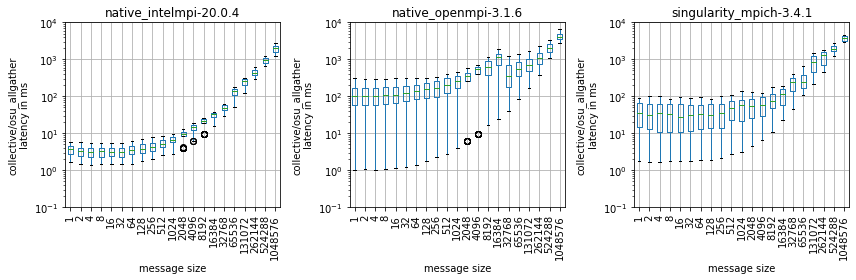

In [12]:
plt.figure(figsize=(12, 4))
for i,runtime in enumerate(df_allgather['runtime'].unique()):
    plt.subplot(1,3,i+1)
    df_allgather.groupby('runtime').get_group(runtime).pivot(columns='message_size', values='latency_avg').boxplot(rot=90)
    plt.yscale('log'); plt.title(runtime); plt.ylabel('collective/osu_allgather\nlatency in ms')
    plt.ylim(1e-1, 1e4); plt.xlabel('message size')
plt.tight_layout()

In [13]:
df_allgather['tasks-per-node'].unique()

array(['4(x2)', '1(x8)', '2(x4)', '8'], dtype=object)

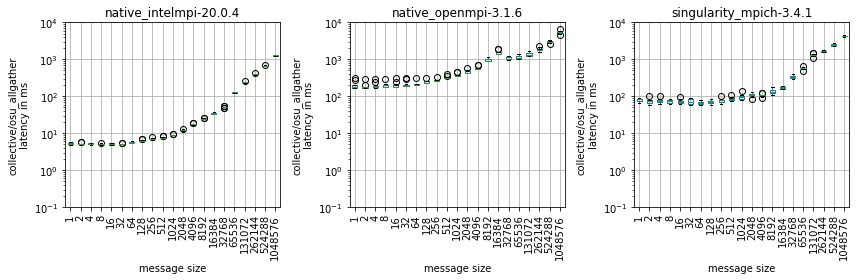

In [14]:
plt.figure(figsize=(12, 4))
for i,runtime in enumerate(df_allgather['runtime'].unique()):
    plt.subplot(1,3,i+1)
    df_allgather.groupby('runtime').get_group(runtime).groupby('tasks-per-node').get_group('1(x8)').pivot(columns='message_size', values='latency_avg').boxplot(rot=90)
    plt.yscale('log'); plt.title(runtime); plt.ylabel('collective/osu_allgather\nlatency in ms')
    plt.ylim(1e-1, 1e4); plt.xlabel('message size')
plt.tight_layout()

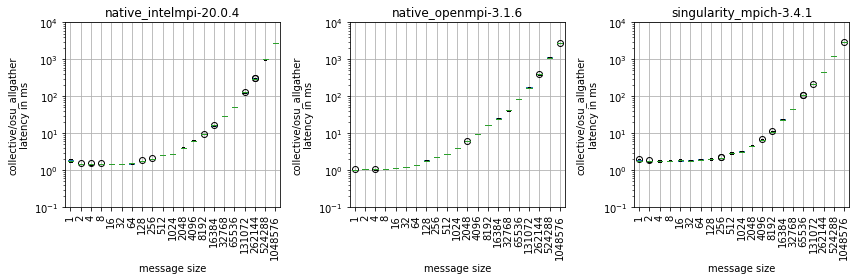

In [15]:
plt.figure(figsize=(12, 4))
for i,runtime in enumerate(df_allgather['runtime'].unique()):
    plt.subplot(1,3,i+1)
    df_allgather.groupby('runtime').get_group(runtime).groupby('tasks-per-node').get_group('8').pivot(columns='message_size', values='latency_avg').boxplot(rot=90)
    plt.yscale('log'); plt.title(runtime); plt.ylabel('collective/osu_allgather\nlatency in ms')
    plt.ylim(1e-1, 1e4); plt.xlabel('message size')
plt.tight_layout()

Python environment,

In [16]:
pip list

Package                       Version
----------------------------- -------------------
anyio                         3.1.0
argon2-cffi                   20.1.0
async-generator               1.10
attrs                         21.2.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
bleach                        3.3.0
brotlipy                      0.7.0
certifi                       2020.12.5
cffi                          1.14.4
chardet                       3.0.4
conda                         4.10.1
conda-package-handling        1.7.2
cryptography                  3.3.1
cycler                        0.10.0
decorator                     5.0.9
defusedxml                    0.7.1
entrypoints                   0.3
idna                          2.10
importlib-metadata            4.2.0
ipykernel                     5.5.5
ipython                       7.23.1
ipython-genutils              0.2.0
jedi                          0.18.0
Jinja

In [17]:
!conda list --explicit

# This file may be used to create an environment using:
# $ conda create --name <env> --file <this file>
# platform: linux-64
@EXPLICIT
https://repo.anaconda.com/pkgs/main/linux-64/_libgcc_mutex-0.1-main.conda
https://conda.anaconda.org/conda-forge/linux-64/ca-certificates-2020.12.5-ha878542_0.tar.bz2
https://repo.anaconda.com/pkgs/main/linux-64/ld_impl_linux-64-2.33.1-h53a641e_7.conda
https://conda.anaconda.org/conda-forge/linux-64/libgfortran4-7.5.0-h14aa051_19.tar.bz2
https://repo.anaconda.com/pkgs/main/linux-64/libstdcxx-ng-9.1.0-hdf63c60_0.conda
https://conda.anaconda.org/conda-forge/linux-64/pandoc-2.13-h7f98852_0.tar.bz2
https://repo.anaconda.com/pkgs/main/noarch/tzdata-2020d-h14c3975_0.conda
https://repo.anaconda.com/pkgs/main/linux-64/libgcc-ng-9.1.0-hdf63c60_0.conda
https://conda.anaconda.org/conda-forge/linux-64/libgfortran-ng-7.5.0-h14aa051_19.tar.bz2
https://repo.anaconda.com/pkgs/main/linux-64/expat-2.4.1-h2531618_2.conda
https://conda.anaconda.org/conda-forge/linux-64/ic